In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
data = pd.read_csv(r'C:\Users\ende\Downloads\Week1_challenge_data_source(CSV).csv', na_values=['?', None])
data.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [4]:
### cleaning 

def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns



def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    
    return df[bytes_data]



In [5]:
 missing_values_table(data)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.6,float64
Nb of sec with 125000B < Vol DL,97538,65.0,float64
TCP UL Retrans. Vol (Bytes),96649,64.4,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.9,float64
TCP DL Retrans. Vol (Bytes),88146,58.8,float64
HTTP UL (Bytes),81810,54.5,float64
HTTP DL (Bytes),81474,54.3,float64


In [6]:
data=data.fillna(data.mean())

In [8]:
data.isnull().sum()

Bearer Id                                      0
Start                                          1
Start ms                                       0
End                                            1
End ms                                         0
Dur. (ms)                                      0
IMSI                                           0
MSISDN/Number                                  0
IMEI                                           0
Last Location Name                          1153
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        0
Avg Bearer TP UL (kbps)                        0
TCP DL Retrans. Vol (Bytes)                    0
TCP UL Retrans. Vol (Bytes)                    0
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)                             0
UL TP < 10 Kbps (%) 

In [9]:
data[['Last Location Name','Handset Manufacturer','Handset Type','End','Start']] = data[['Last Location Name','Handset Manufacturer','Handset Type','End','Start']].fillna(method='ffill')

In [10]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.000000,5.000000,23.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.0,26.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,109.795706,17.662883,44.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,3330.0,37882.0,1.321510e+09,undefined,undefined,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150001 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

In [11]:
data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.144710e+08,3.242301e+06,1.829177e+06,1.408880e+06,1.046091e+08,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.883600e+18,288.610872,288.096693,8.103735e+04,2.144722e+10,2.438731e+12,2.237359e+13,559.342620,76.529933,23971.798635,4625.340082,1.172356e+08,1.577616e+07,13.005221,6.199592,4.149070,4.816738,4.622035,3.216651,1.620229,1.291972,6.510226e+08,1.319532e+07,5.696376e+06,4.643215e+06,8.103734e+07,1505.998852,891.810917,1129.732542,442.321088,1248.149035,501.006824,9148.498009,10133.431600,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127635e+07,2.441421e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744200e+04,2.082014e+14,3.365151e+10,3.546261e+13,35.000000,3.000000,43.000000,47.000000,1.332932e+06,6.300900e+04,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,3.028893e+06,3.360160e+05,1.487800e+04,2.154000e+04,5.744206e+07,533.000000,121.000000,453.000000,149.257052,527.000000,141.304812,88.000000,107.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e

In [12]:
data['Handset_Manufacturer']=data['Handset Manufacturer']

In [13]:
x=data.query("Handset_Manufacturer =='TCL Communication Ltd'")

In [14]:
clean=data.copy(deep=True)

In [15]:
y=clean.query("Handset_Manufacturer=='Tp-Link Technologies Co Ltd'")

In [16]:
z=clean.query("Handset_Manufacturer=='Lg'")

In [17]:
for i in x.index:
    clean.update(pd.Series(["Tcl Communication Ltd"],name='Handset_Manufacturer',index=[i]))
    

In [18]:
for i in y.index:
    clean.update(pd.Series(["TP-Link Technologies Co Ltd"],name='Handset_Manufacturer',index=[i]))
    

In [19]:
for i in z.index:
    clean.update(pd.Series(["LG"],name='Handset_Manufacturer',index=[i]))
    

In [20]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=clean, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=clean, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = clean, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(clean, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = clean, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = clean, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = clean, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()



    

In [22]:
df=clean.copy(deep=True)
df.to_csv(r"C:\Users\ende\Desktop\Data\df.csv")

In [27]:
x=df[df.columns[39:55]]

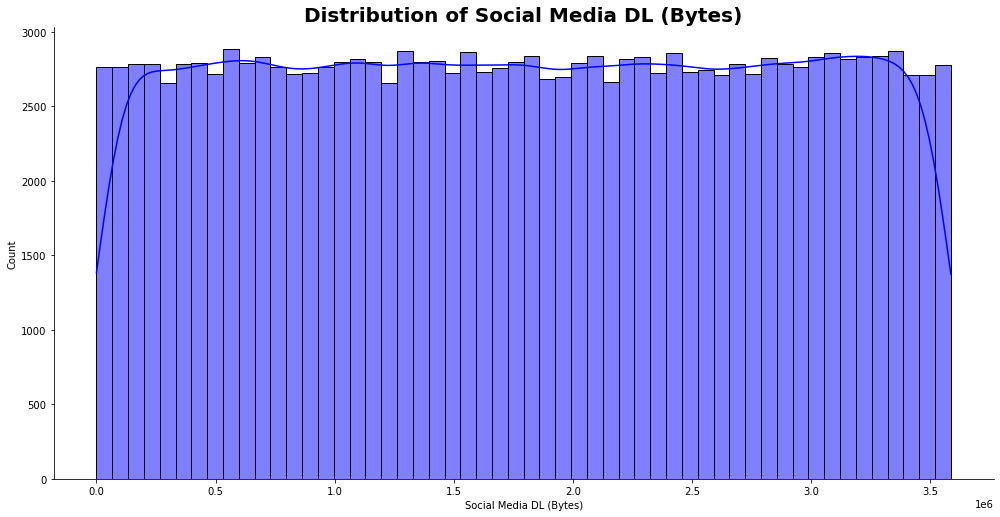

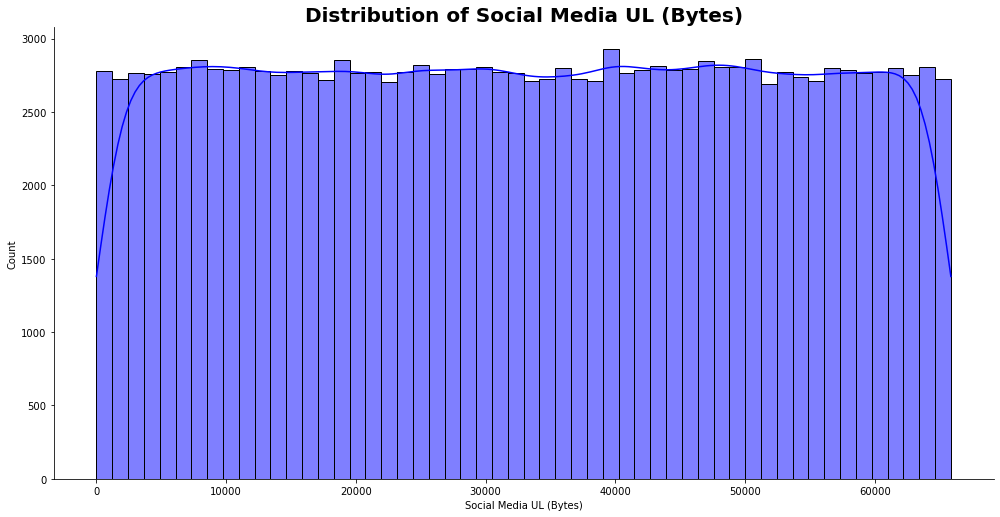

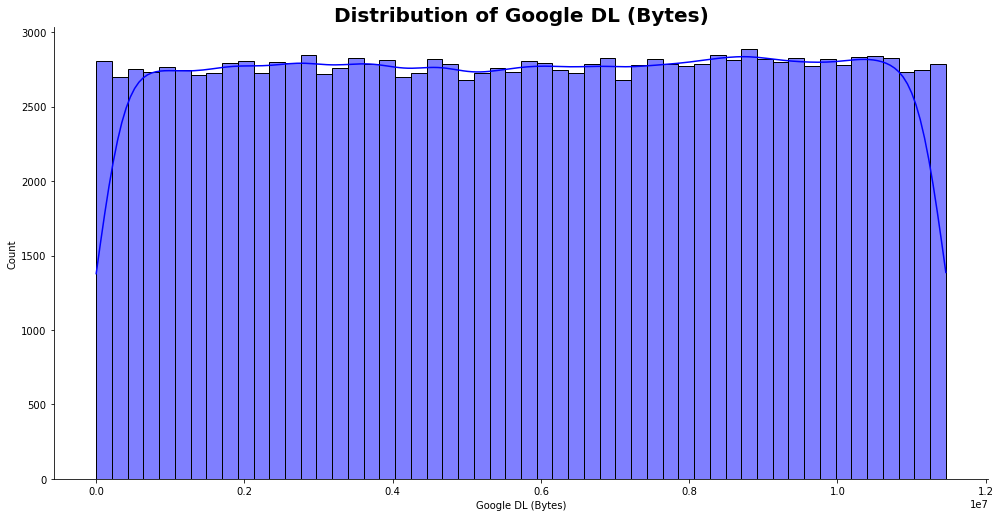

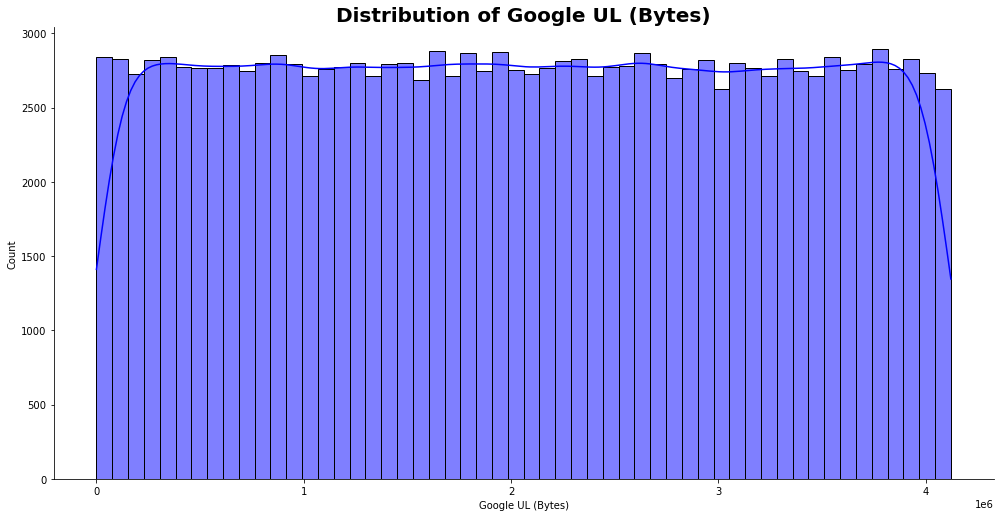

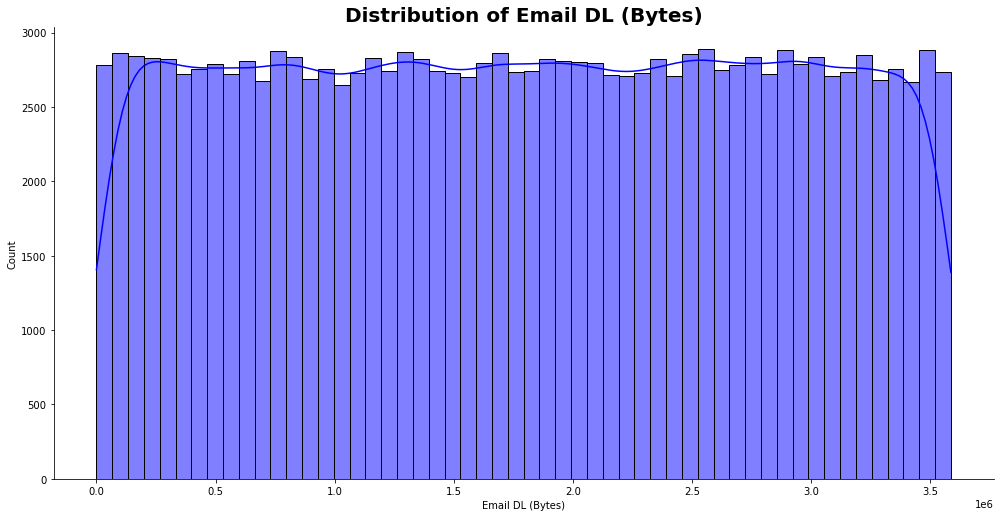

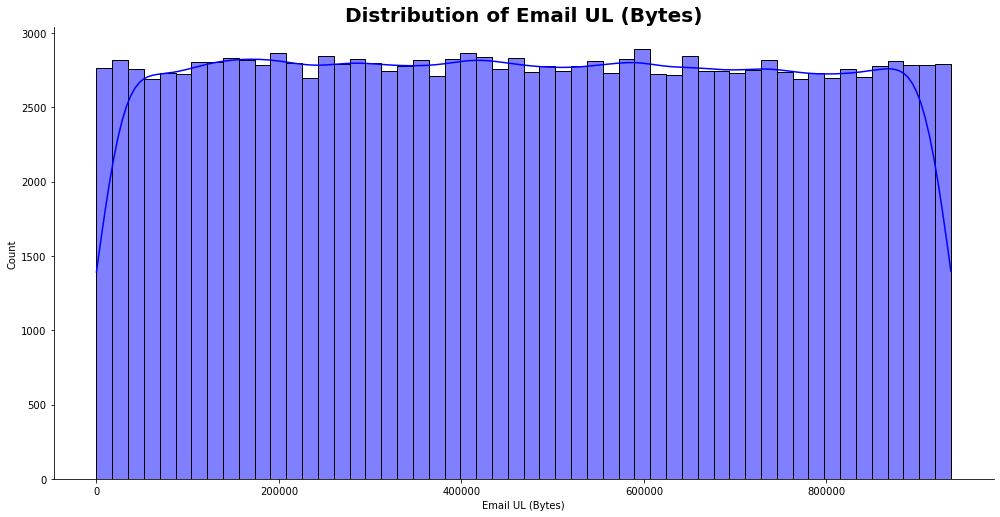

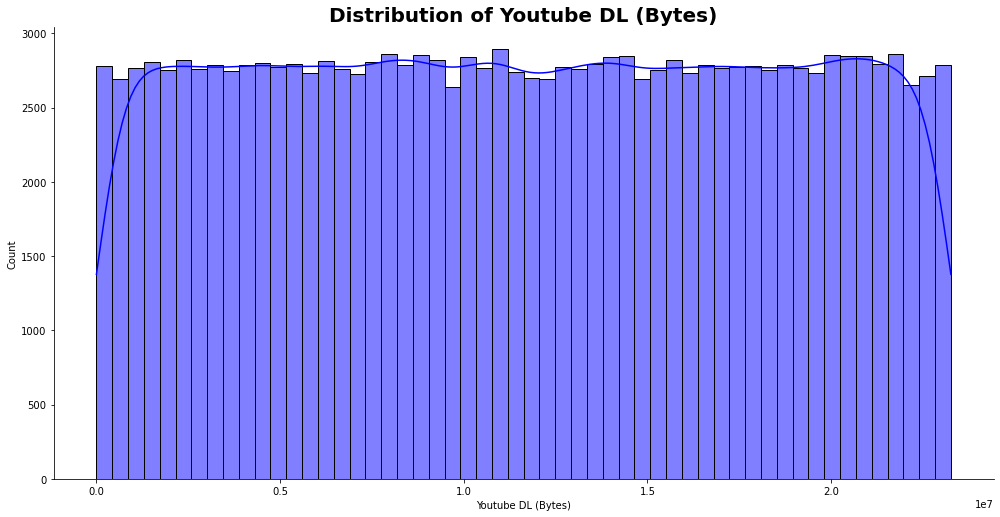

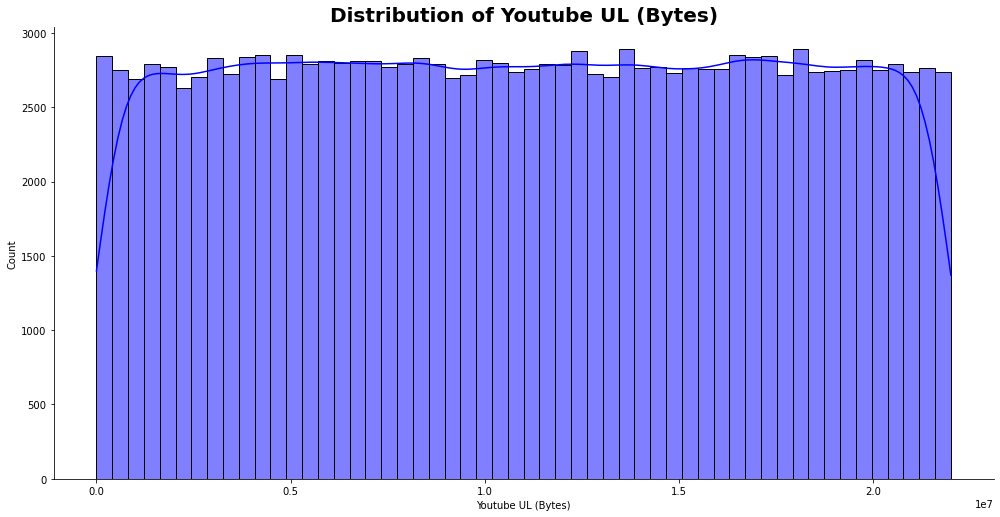

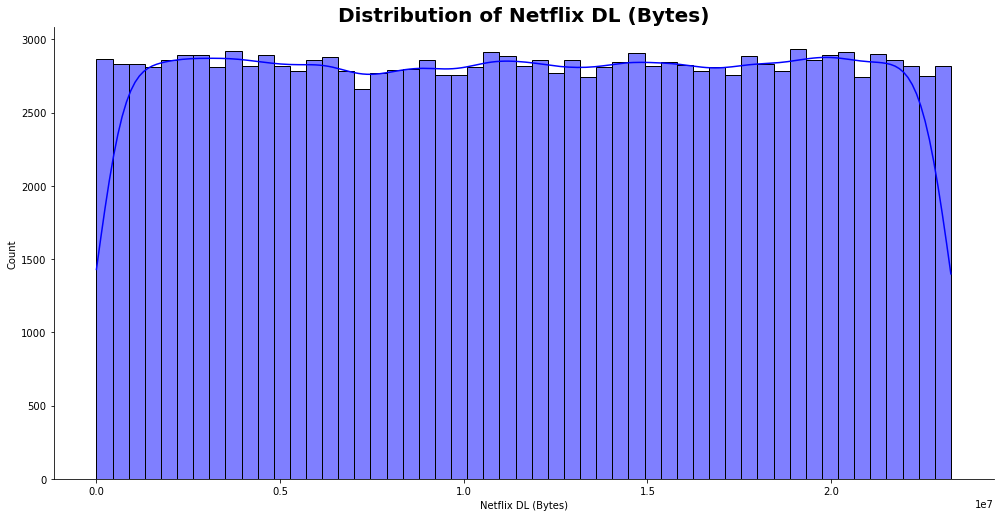

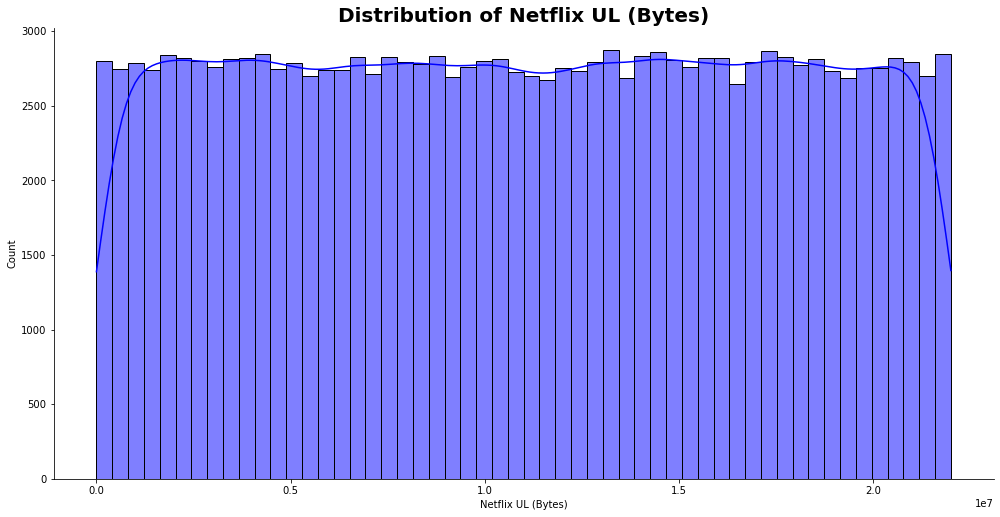

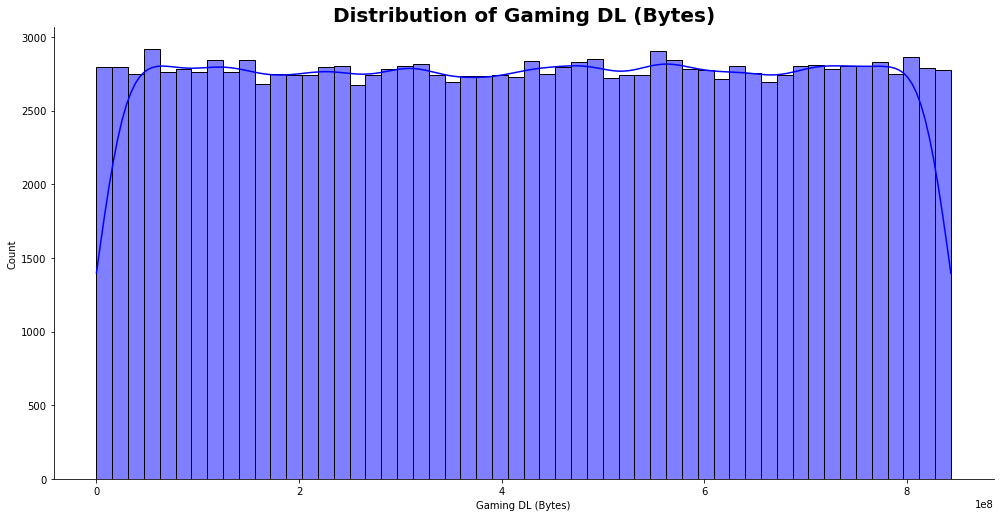

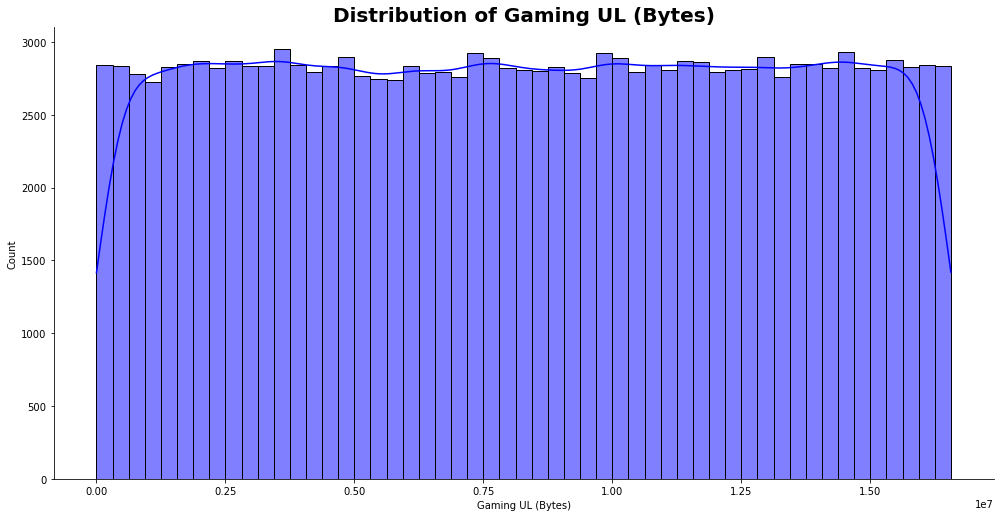

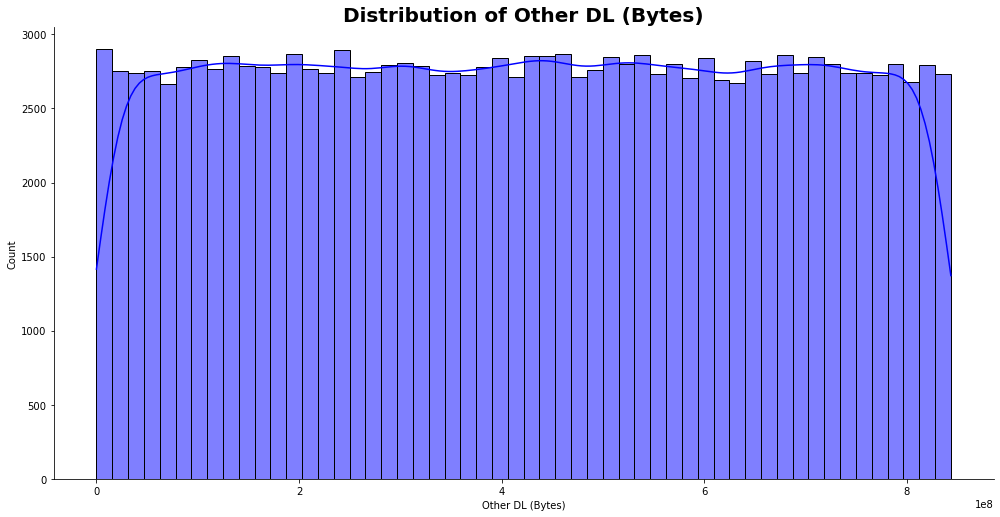

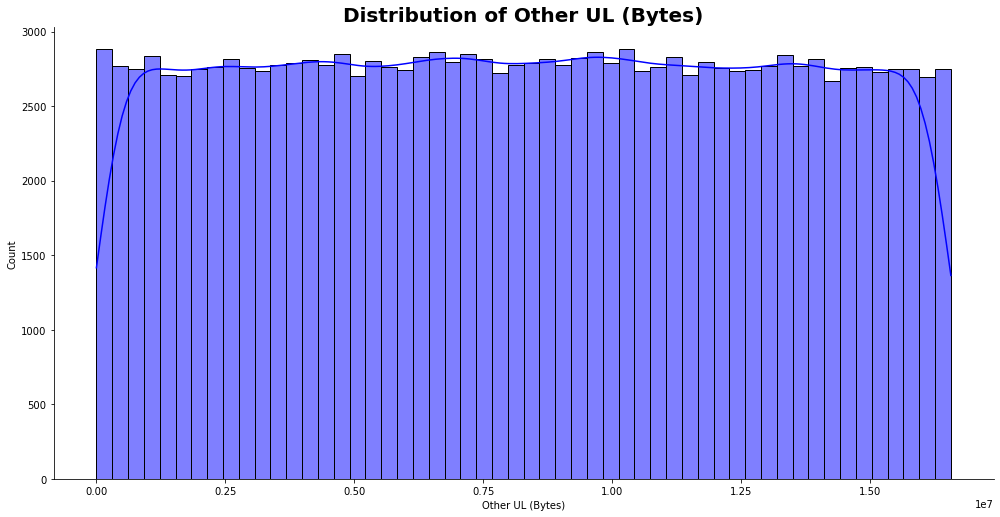

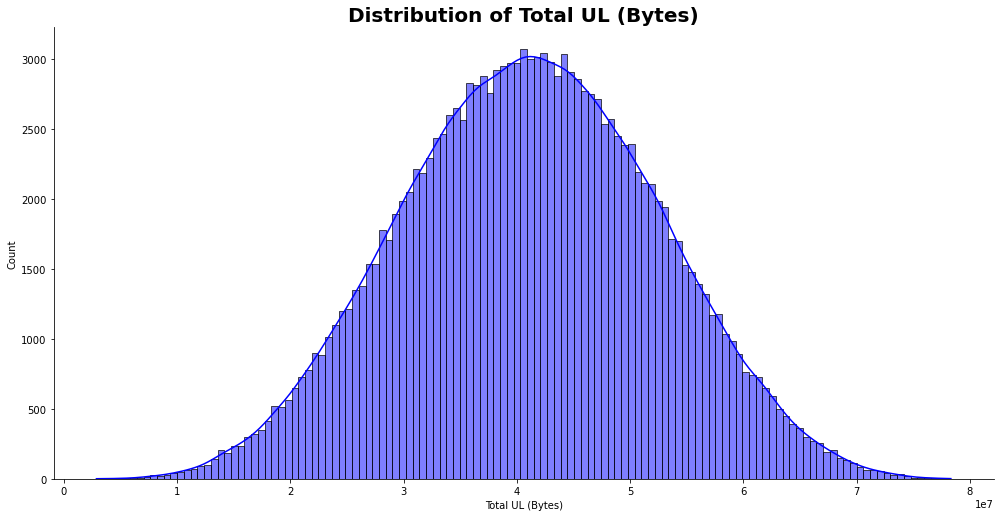

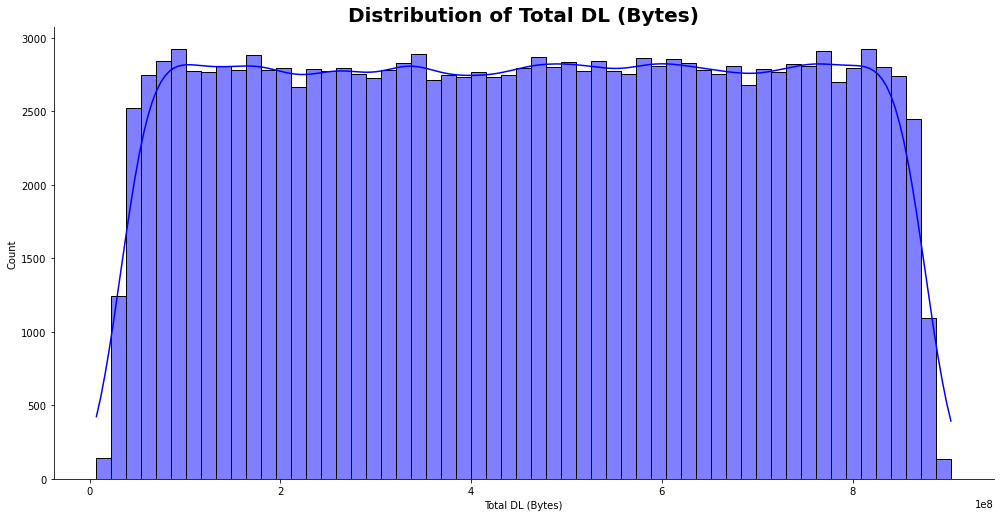

In [29]:
for i in x:
    plot_hist(df, i, "Blue")
   
    

In [ ]:
print("{} plot.".format(i))

# this will print:
# You have 5 apples.

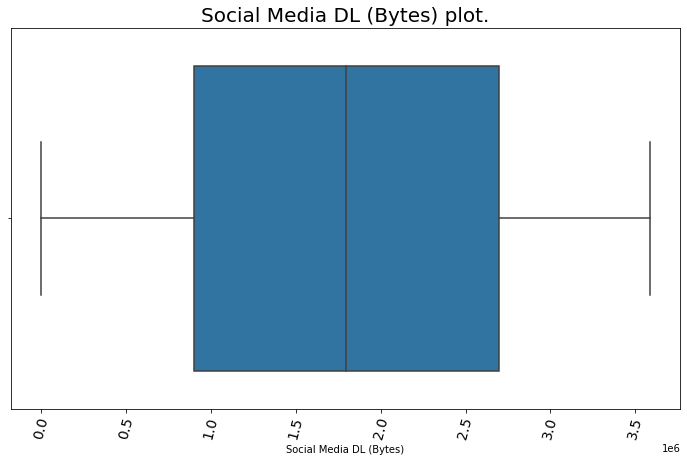

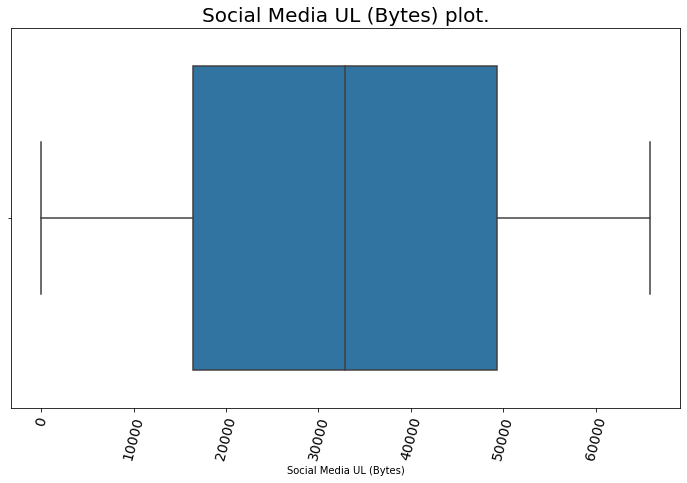

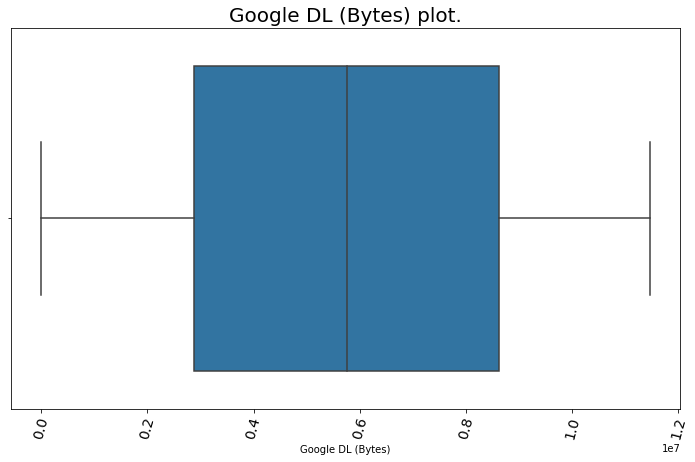

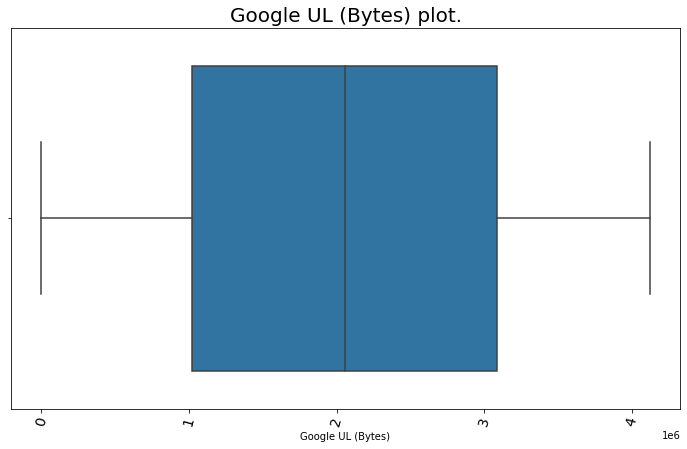

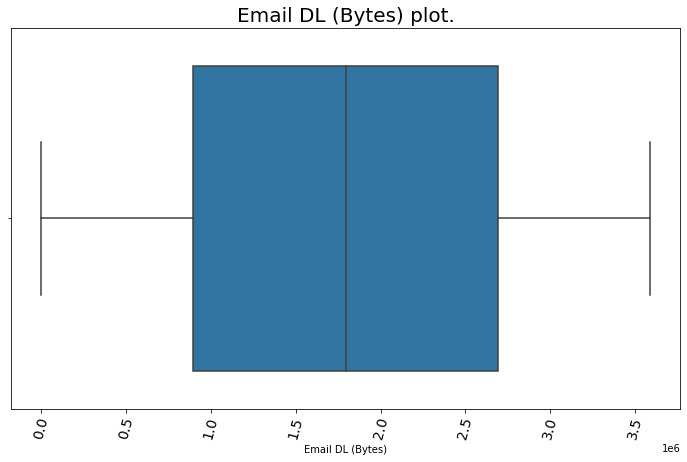

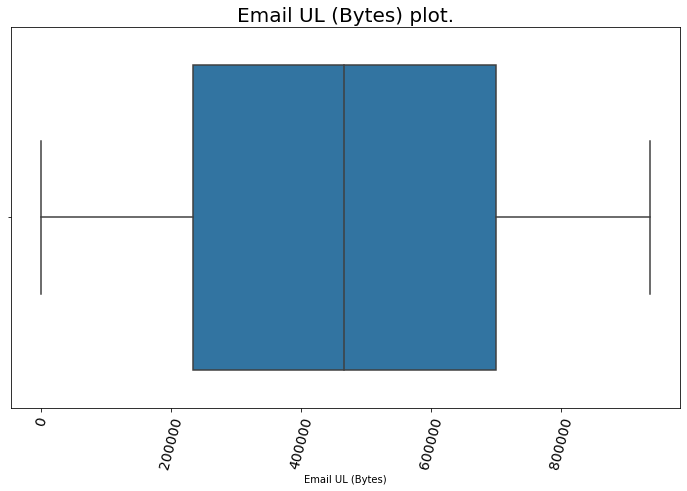

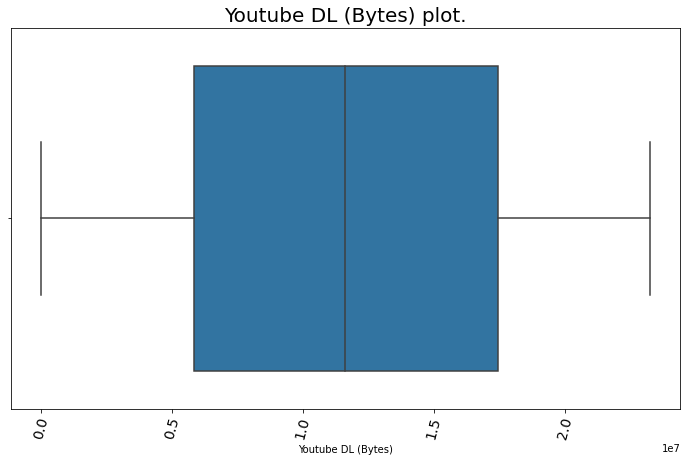

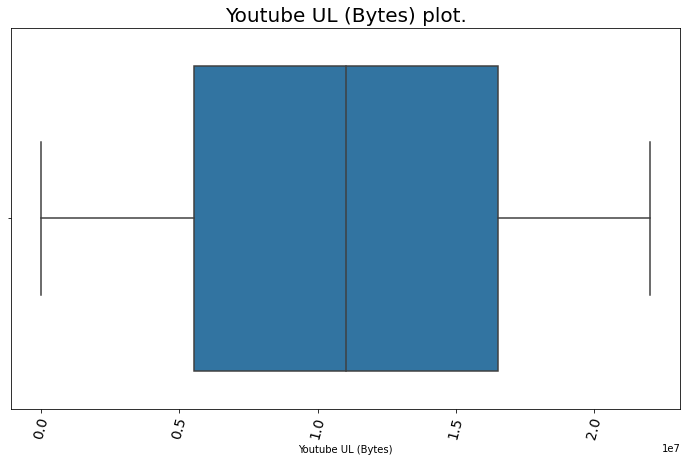

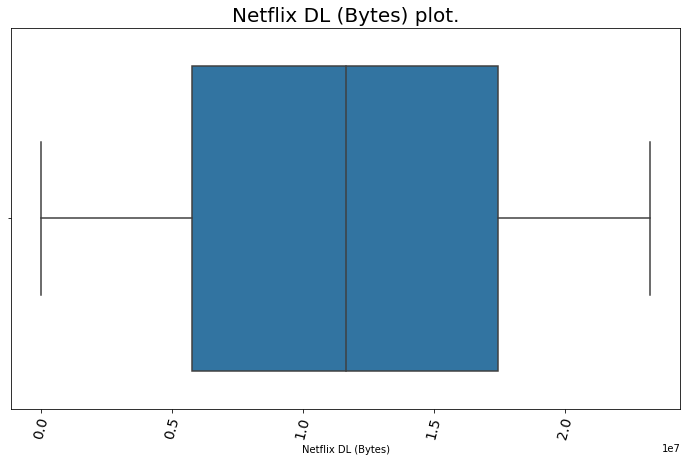

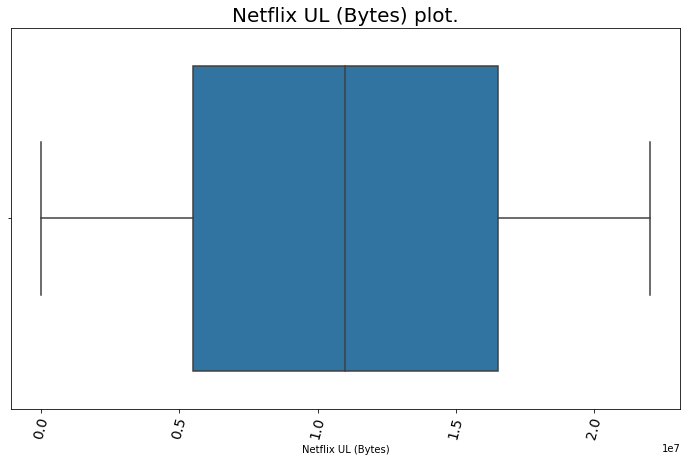

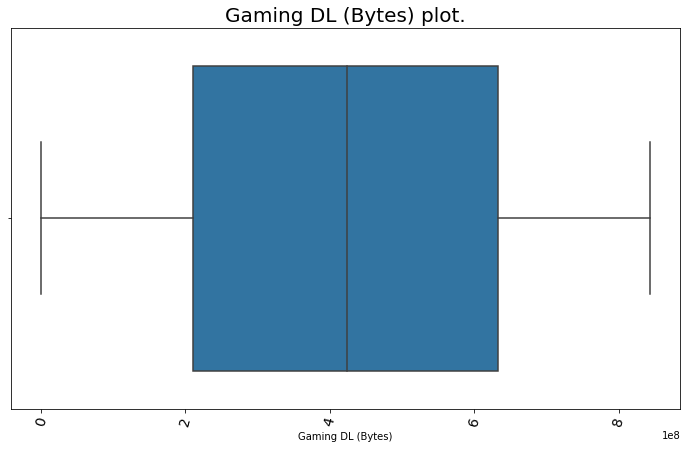

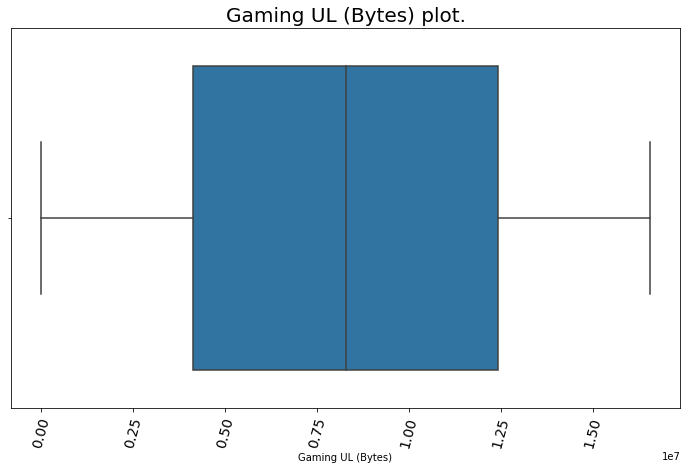

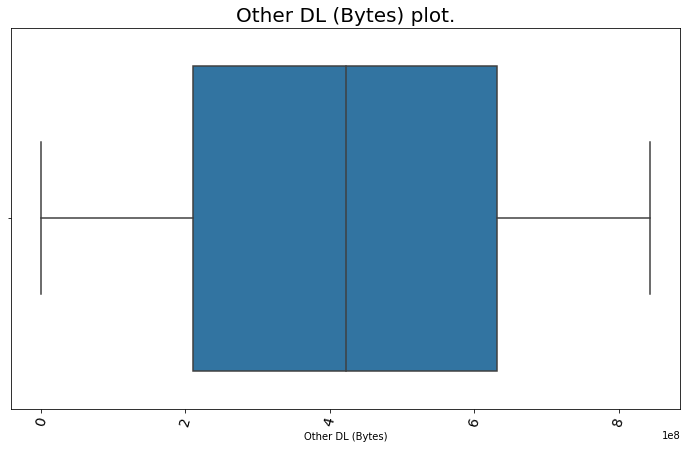

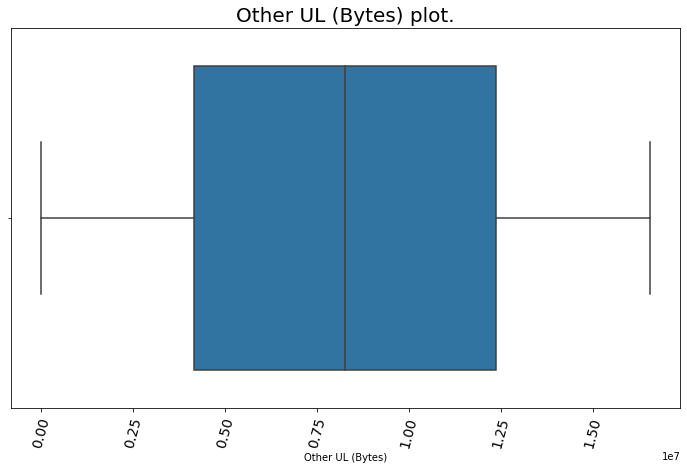

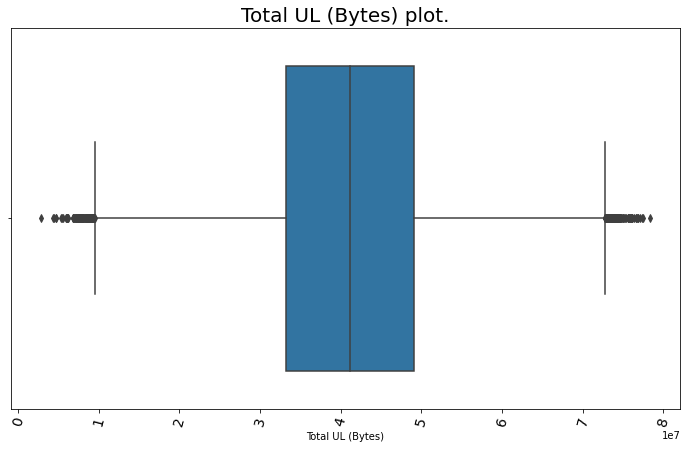

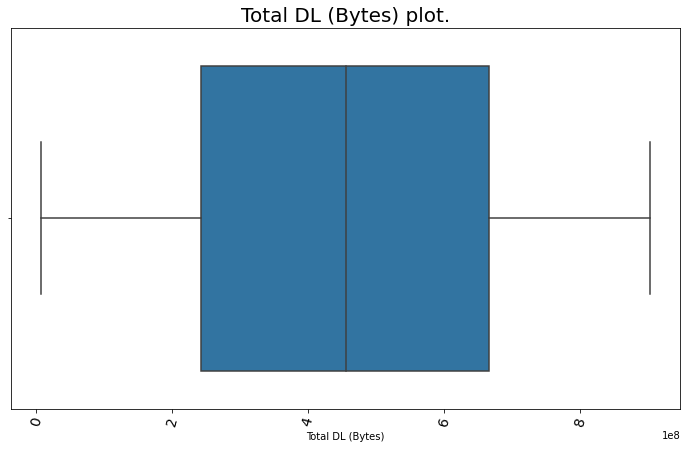

In [34]:
for i in x:
    plot_box(df, i,("{} plot.".format(i)))
   
    

<AxesSubplot:>

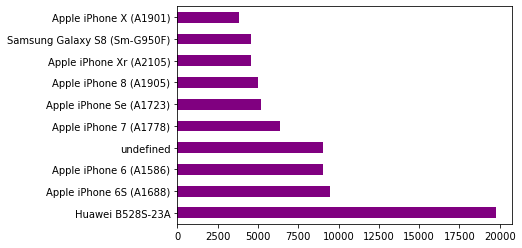

In [35]:
df['Handset Type'].value_counts()[:10].plot(kind='barh',color= 'purple')

<AxesSubplot:ylabel='Handset Manufacturer'>

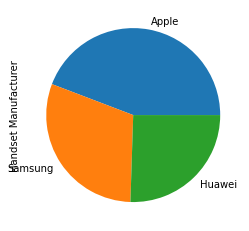

In [41]:
df['Handset Manufacturer'].value_counts()[:3].plot(kind='pie')

In [ ]:
from matplotlib import pandas as pd
df.plot(x="'Handset Manufacturer", y=["Age", "Height(cm)", "Weight(kg)"], kind="bar",figsize=(9,8))
plt.show()

In [ ]:
data['Handset Manufacturer'].value_counts()[:3]

In [ ]:
plot_scatter(df.head(100), x_col='Google DL (Bytes)', y_col='Google UL (Bytes)', hue='Start',
             style='Start', title="number of medications vs number of lab procedures")

In [ ]:
plot_scatter(df.head(1000), x_col='Total UL (Bytes)', y_col='Total DL (Bytes)', hue='Handset_Manufacturer',
             style='Handset_Manufacturer', title="number of lab procedures vs time in hospital")

In [ ]:
plot_box_multi(df, x_col="Start", y_col='Total DL (Bytes)', title="number of medications outilers in race column")

In [ ]:
dfPair = df[['Social Media DL (Bytes)', 'Social Media UL (Bytes)','Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)','Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)','Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)','Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)','Total UL (Bytes)', 'Total DL (Bytes)']]

In [ ]:
sns.pairplot(dfPair, hue = 'Total DL (Bytes)', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=4)

In [42]:
df['Decile_rank'] = pd.qcut(df['Dur. (ms)'], 5,
                            labels = False)

In [ ]:
dfnew.head(5)

In [ ]:
#df['total']=df['Total DL (Bytes)'] + df['Total UL (Bytes)']
df.drop('total',axis=1 , inplace= True)

In [38]:
#df['total']=df['Total DL (Bytes)'] + df['Total UL (Bytes)']
df.drop('fixed_UL',axis=1 , inplace= True)

In [43]:

df['total']=(df['Total DL (Bytes)'] + df['Total UL (Bytes)'])
df.tail()
   

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Handset_Manufacturer,Decile_rank,total
149996,7.277826e+18,4/29/2019 7:28,451.0000,4/30/2019 6:02,214.00000,81230.000000,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,32.000000,0.000000,52.000000,65.000000,2.080991e+07,759658.664811,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.144710e+08,3.242301e+06,4.237600e+04,4.191500e+04,8.123076e+07,Apple,Apple iPhone 8 Plus (A1897),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,223.000000,229.000000,3.464974e+06,52091.00000,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08,Apple,1,6.318041e+08
149997,7.349883e+18,4/29/2019 7:28,483.0000,4/30/2019 10:41,187.00000,97970.000000,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,27.000000,2.000000,23.000000,54.000000,2.080991e+07,759658.664811,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.144710e+08,3.242301e+06,1.726400e+04,1.675900e+04,9.797070e+07,Apple,Apple iPhone Se (A1723),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,105.000000,102.000000,2.344568e+06,7613.00000,2.229420e+06,2.185941e+06,1.954414e+06,167304.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08,Apple,3,7.057839e+08
149998,1.311448e+19,4/29/2019 7:28,283.0000,4/30/2019 10:46,810.00000,98249.000000,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,43.000000,6.000000,43.000000,47.000000,2.080991e+07,759658.664811,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.144710e+08,3.242301e+06,2.500300e+04,2.864000e+04,9.824953e+07,Apple,Apple iPhone Xs (A2097),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,104.000000,108.000000,1.245845e+06,14394.00000,3.850890e+06,2.734579e+06,1.525734e+06,532543.00000,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08,Apple,3,6.276986e+08
149999,1.311448e+19,4/29/2019 7:28,696.0000,4/30/2019 10:40,327.00000,97910.000000,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,37.000000,5.000000,34.000000,37.000000,2.080991e+07,759658.664811,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.144710e+08,3.242301e+06,1.340500e+04,3.408800e+04,9.791063e+07,Huawei,Huawei Fig-Lx1,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,43.000000,82.000000,8.015470e+05,21562.00000,4.189773e+06,3.567494e+06,2.228270e+06,622644.00000,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08,Huawei,3,4.015220e+08
150000,1.013887e+19,4/29/2019 7:28,499.1882,4/30/2019 10:40,498.80088,104608.560347,2.082016e+14,4.1

In [ ]:
#plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:

In [ ]:
df.plot(x="MSISDN/Number", y=["total", "Dur. (ms)"][:10], kind="bar")

In [73]:
(df.select_dtypes(include=['object'])).columns.tolist()

['Start',
 'End',
 'Last Location Name',
 'Handset Manufacturer',
 'Handset Type',
 'Handset_Manufacturer']

In [44]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
df['Handset Manufacturer'] = lb.fit_transform(df['Handset Manufacturer'])
df['Handset Type'] = lb.fit_transform(df['Handset Type'])

df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Handset_Manufacturer,Decile_rank,total
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.000000,5.000000,23.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,37624.0,38787.0,1.823653e+09,103,838,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,Samsung,4,345629377.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.0,26.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,168.0,3560.0,1.365104e+09,103,888,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,Samsung,4,707185356.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,0.0,0.0,1.361763e+09,103,850,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,Samsung,4,307690973.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,109.795706,17.662883,44.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,3330.0,37882.0,1.321510e+09,169,1395,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,undefined,4,889352748.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,0.0,0.0,1.089009e+09,103,1014,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,Samsung,4,607681403.0


In [45]:
selected_features=df[['Bearer Id','Dur. (ms)','IMSI','MSISDN/Number','IMEI','HTTP DL (Bytes)','HTTP UL (Bytes)','Handset Manufacturer','Handset Type','Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)','Other UL (Bytes)','Total UL (Bytes)','Total DL (Bytes)','total']]
len(selected_features)

150001

In [86]:
selected_features.head()

,Bearer Id,Dur. (ms),IMSI,MSISDN/Number,IMEI,HTTP DL (Bytes),HTTP UL (Bytes),Handset Manufacturer,Handset Type,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),total
0,1.311448e+19,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,1.144710e+08,3.242301e+06,103,838,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,345629377.0
1,1.311448e+19,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,1.144710e+08,3.242301e+06,103,888,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,707185356.0
2,1.311448e+19,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,1.144710e+08,3.242301e+06,103,850,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,307690973.0
3,1.311448e+19,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,1.144710e+08,3.242301e+06,169,1395,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,889352748.0
4,1.311448e+19,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,1.144710e+08,3.242301e+06,103,1014,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,607681403.0


In [46]:
import pandas as pd

# load the training dataset

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(selected_features)

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.27112477,  0.55700239],
       [-0.41336468,  0.54393029],
       [ 0.34329524,  0.5599466 ],
       [-0.78814197,  0.68882943],
       [-0.23496781,  0.56838606],
       [-0.59809505,  0.69272831],
       [ 0.7331377 ,  0.4947531 ],
       [-0.67248763,  0.73103894],
       [-0.80999626,  0.53285439],
       [-0.76824369,  0.53256207]])

In [47]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(selected_features.values)
# View the cluster assignments
km_clusters

array([0, 0, 0, ..., 0, 0, 2])

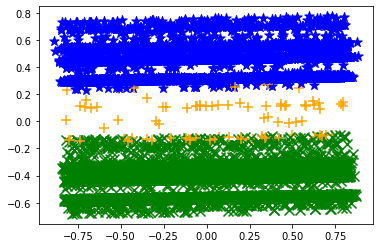

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from joblib import dump,load
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

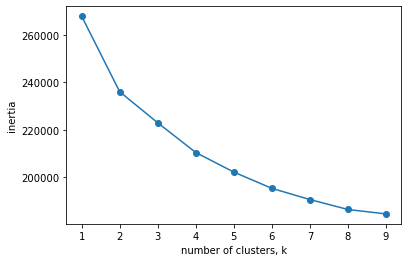

In [48]:
from sklearn.cluster import KMeans
ks = range(1, 10)    # varying cluster values from 1 to 10
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_features)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias, to apply elbow method
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [49]:
# Based on elbow method, optimal number of clustering is 5
# Hence, creating KMeans model with 5 clusters for further analysis

model = KMeans(n_clusters=3)
model.fit(scaled_features)
print(model.labels_)

[0 0 0 ... 0 0 0]


In [110]:
model.cluster_centers_

array([[6.37567810e-02, 5.24402130e-02, 4.14306836e-01, 2.67723788e-05,
        4.49795367e-01, 1.42224191e-03, 2.03713076e-03, 3.13473117e-01,
        3.24156909e-01, 5.01005303e-01, 4.99192082e-01, 4.99352663e-01,
        4.96326434e-01, 4.99330253e-01, 4.99126837e-01, 4.96094223e-01,
        4.99857401e-01, 4.99081485e-01, 4.99085799e-01, 2.46497121e-01,
        5.00974790e-01, 4.98860229e-01, 4.97411786e-01, 6.51162217e-01,
        2.60368146e-01, 2.72171732e-01],
       [6.33314245e-02, 5.26523290e-02, 4.14344918e-01, 1.00943211e-05,
        4.50939492e-01, 1.38441597e-03, 1.95700218e-03, 3.18521583e-01,
        3.28900349e-01, 5.00853701e-01, 5.01170894e-01, 5.04187312e-01,
        5.00311120e-01, 4.98533672e-01, 4.99270626e-01, 5.05542099e-01,
        5.00824658e-01, 5.01052715e-01, 5.02468176e-01, 7.48653727e-01,
        5.01911049e-01, 4.99083338e-01, 5.02199789e-01, 6.55371856e-01,
        7.33498280e-01, 7.31472167e-01],
       [9.80190216e-01, 5.26997184e-02, 4.14326656e-01

In [52]:
df['label'] = model.labels_

In [120]:
df.tail(50)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Handset_Manufacturer,Decile_rank,total,label
149951,1.304243e+19,4/29/2019 7:28,728.0000,4/30/2019 7:28,643.00000,86399.000000,2.082014e+14,3.366513e+10,8.637690e+13,T73896C,52.000000,61.000000,23946.000000,9680.000000,4.242519e+06,69408.000000,82.000000,8.000000,1.000000,6.000000,99.000000,0.000000,0.000000,0.000000,8.763574e+07,1.870951e+06,1.861298e+07,1.630134e+07,8.639992e+07,52,316,2440.000000,189.000000,559.000000,4.000000,3037.000000,16.000000,28986.000000,21877.000000,1.224460e+06,32419.00000,2.234382e+06,2.859089e+06,2.664337e+06,850586.00000,2.673630e+05,1.038150e+07,2.289055e+07,1.487852e+07,1.028227e+08,2.732534e+06,6.667727e+08,1.060172e+07,4.233637e+07,1.321038e+08,Huawei,1,1.744401e+08,2
149952,1.311448e+19,4/29/2019 7:28,76.0000,4/30/2019 10:39,950.00000,97868.000000,2.082015e+14,3.363552e+10,3.536981e+13,T29884C,109.795706,17.662883,60.000000,61.000000,2.080991e+07,759658.664811,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.144710e+08,3.242301e+06,2.866600e+04,3.070800e+04,9.786887e+07,169,1395,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,122.000000,149.000000,3.446190e+05,600.00000,2.500173e+06,4.614540e+05,3.406718e+06,593415.00000,1.265355e+07,6.570553e+06,1.774276e+07,4.143342e+06,3.328353e+08,1.548721e+06,8.315627e+07,5.407129e+06,1.872521e+07,3.694831e+08,undefined,3,3.882083e+08,2
149953,1.304243e+19,4/29/2019 7:28,598.0000,4/30/2019 8:10,652.00000,88913.000000,2.082017e+14,3.366411e+10,3.594081e+13,T79495B,59.000000,6.000000,42.000000,40.000000,2.080991e+07,759658.664811,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.144710e+08,3.242301e+06,2.668600e+04,3.042500e+04,8.891305e+07,5,75,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,97.000000,101.000000,2.636738e+06,64801.00000,2.206935e+06,2.982894e+06,6.151110e+05,883254.00000,1.245757e+07,1.771914e+07,1.401562e+07,6.120957e+06,4.667091e+08,4.667335e+06,8.243057e+08,1.078627e+07,4.322466e+07,4.986411e+08,Apple,2,5.418658e+08,2
149954,7.277826e+18,4/29/2019 7:28,889.0000,4/30/2019 7:28,895.00000,86400.000000,2.082021e+14,3.366646e+10,8.611970e+13,L14192C,28.000000,9.000000,32602.000000,1368.000000,1.331750e+05,22736.000000,85.000000,10.000000,2.000000,1.000000,98.000000,1.000000,0.000000,0.000000,6.521237e+06,7.169930e+05,1.431299e+06,1.484571e+06,8.640001e+07,52,415,58.000000,66.000000,119.000000,149.257052,546.000000,1.000000,4360.000000,5040.000000,2.164160e+05,11157.00000,2.470919e+06,1.803828e+06,3.843920e+05,564037.00000,1.200777e+06,9.921810e+06,1.597243e+07,3.830702e+06,2.739976e+08,3.886903e+06,6.321710e+08,1.490221e+07,3.492065e+07,2.942425e+08,Huawei,2,3.291632e+08,0
149955,7.349883e+18,4/29/2019 7:28,178.0000,4/30/2019 9:49,555.00000,94861.000000,2.082021e+14,3.366646e+10,8.611970e+13,L12757A,21.000000,1006.000000,35.000000,35

In [135]:
df_app=df[df.columns[39:53]]

In [136]:
df_app

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
0,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06
1,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07
2,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06
3,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07
4,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,3.464974e+06,52091.00000,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07
149997,2.344568e+06,7613.00000,2.229420e+06,2.185941e+06,1.954414e+06,167304.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06
149998,1.245845e+06,14394.00000,3.850890e+06,2.734579e+06,1.525734e+06,532543.00000,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07
149999,8.015470e+05,21562.00000,4.189773e+06,3.567494e+06,2.228270e+06,622644.00000,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06


In [98]:
import pickle
xtrain,xtest,ytrain,ytest = train_test_split(selected_features,y,test_size=0.2,random_state=40)





pickle.dump(scaled_features, open("scaler.pkl", 'wb'))
dump(scaled_features,'scaler.joblib')
# transfromation of trainig data







['scaler.joblib']